In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
X = boston['data']
Y = np.int_(boston['target'])

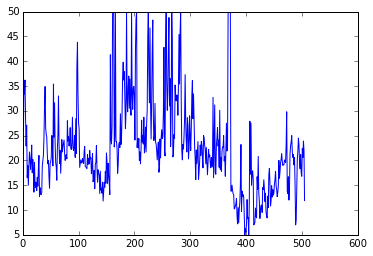

In [6]:
plt.plot(boston['target'])

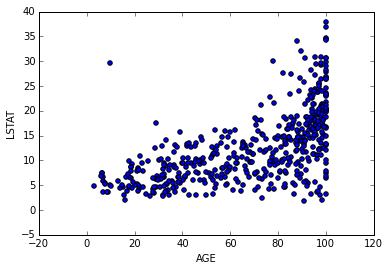

In [11]:
plt.scatter(X[:,6], X[:,12])
plt.xlabel(boston.feature_names[6])
plt.ylabel(boston.feature_names[12])

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X[:200], Y[:200])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

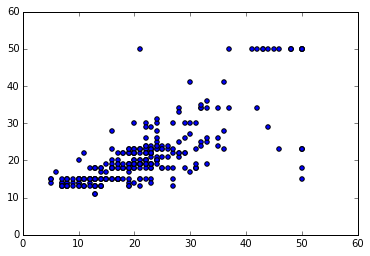

In [14]:
prediction = rf.predict(X[200:])
plt.scatter(Y[200:], prediction)

In [20]:
n_trees_total = 50
square_sum = np.zeros(n_trees_total)
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators=i+1)
    rf.fit(X[:200], Y[:200])
    prediction = rf.predict(X[200:])
    square_sum[i] = sum((prediction - Y[200:])**2)

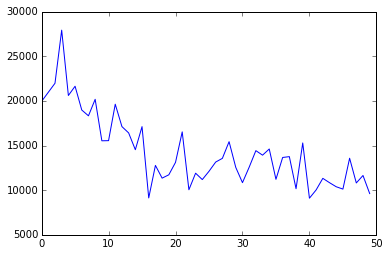

In [21]:
plt.plot(square_sum)

In [22]:
ii = np.argsort(rf.feature_importances_)
for name, value in zip(boston.feature_names[ii], rf.feature_importances_[ii]):
    print(name, value)

('CHAS', 0.0046377184535015834)
('ZN', 0.017500655263471464)
('RAD', 0.029868903480965766)
('TAX', 0.045521828262488427)
('PTRATIO', 0.049663003732356492)
('INDUS', 0.053750333764204995)
('NOX', 0.055454213478860155)
('DIS', 0.09412769950519019)
('B', 0.10817594776202485)
('AGE', 0.11984023199158328)
('CRIM', 0.12905896723622404)
('RM', 0.14024124253305359)
('LSTAT', 0.15215925453607526)


(306, 32)


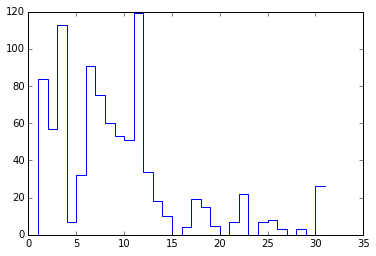

In [23]:
class_probabilities = rf.predict_proba(X[200:])
n_classes = np.shape(class_probabilities)[1]
print(np.shape(class_probabilities))
n_in_classes = np.zeros(n_classes)
for i in range(n_classes):
     ii  = class_probabilities[:,i] > 0.1
     n_in_classes[i] = len(class_probabilities[ii,i])
plt.plot(n_in_classes, drawstyle='steps')

### Ejercicio
Utilice el siguiente dataset para clasificarlo con un bosque aleatorio
http://archive.ics.uci.edu/ml/datasets/Dorothea